# 2 - Korpus Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/Users/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
poems = pd.read_csv("../corpora/german_poems.csv")
poems = poems[poems["year"] >= 1870]

In [3]:
poems.shape

(9756, 7)

In [4]:
poems.head(1)

,pid,filename,poet,title,year,poem,poemlength
0,38237,"Dahn, Felix_Ein Königsspiel_1873","Dahn, Felix",Ein Königsspiel,1873,Saß der König Artaxerxes In dem goldnen Haus z...,594


## Data cleaning (TODO zu part 1)

In [52]:
old_s = ("ſ", "s")
poems["poem"] = poems["poem"].str.replace(old_s[0], old_s[1])

## Wordclouds

In [7]:
def remove_pos(lst):
    nlp = spacy.load('de')
    new_lst = []
    for s in lst:
        posstr = nlp(s)
        new_string = ""
        for token in posstr:  
            used_pos = ["VERB", "ADJ", "NOUN"]
            if token.pos_ in used_pos:
                new_string = new_string + token.text + " "
        new_lst.append(new_string)
        
    return new_lst
    

def get_top_n_words(column, n=None, stopwords="", pos_remove = False):
    texts = list(column)#[:1000]
    
    if pos_remove:
        texts = remove_pos(texts)
    
    vectorizer = TfidfVectorizer(max_features=None,
                                 stop_words=stopwords)
    vector = vectorizer.fit_transform(texts)
    sum_words = vector.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
stopwords = get_stop_words("de")
top_words = dict(get_top_n_words(poems["poem"], n=100, stopwords=stopwords))

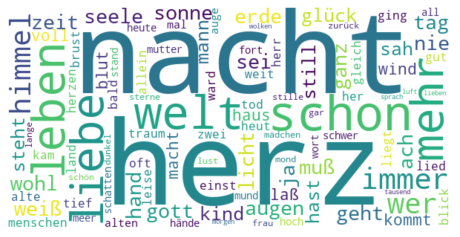

In [9]:
plt.rcParams['figure.dpi']= 300

# Create and generate a word cloud image:
wordcloud = WordCloud(width=600,
                      height=300,
                      background_color="white").generate_from_frequencies(top_words)

# Display the generated image:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

## Histogramme

### Verteilung der Gedichte nach Erscheinungsjahren

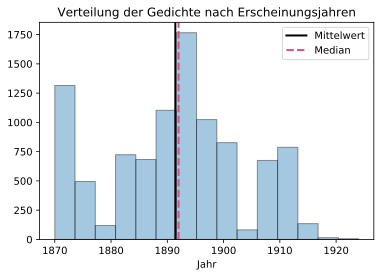

In [17]:
sns.distplot(poems.year, 
             kde=False, 
             rug=False, 
             bins=15, 
             hist_kws=dict(edgecolor="black", linewidth=1),
             axlabel="Jahr")
plt.axvline(poems.year.mean(), 0, 1, 
            linestyle="-",
            linewidth=2.0,
            color="black",
            label="Mittelwert")
plt.axvline(poems.year.median(), 0, 1, 
            linestyle="--",
            linewidth=2.0,
            color="#d45087",
            label="Median")
plt.legend()
plt.title("Verteilung der Gedichte nach Erscheinungsjahren")
plt.show()

### Verteilung der Gedichte nach Anzahl der Tokens

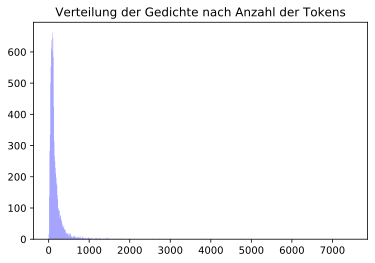

In [25]:
sns.distplot(poems.poemlength, 
             kde=False, 
             rug=False, 
             bins=range(1, 7500, 10), 
             hist_kws=dict(edgecolor="black", linewidth=0, color="blue"),
             axlabel="")
plt.title("Verteilung der Gedichte nach Anzahl der Tokens")
plt.show()

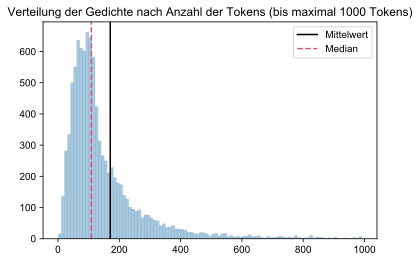

In [26]:
sns.distplot(poems.poemlength, 
             kde=False, 
             rug=False, 
             bins=range(1, 1000, 10), 
             hist_kws=dict(edgecolor="black", linewidth=0.1),
             axlabel="")
plt.axvline(poems.poemlength.mean(), 0, 1, 
            linestyle="-",
            color="black",
            label="Mittelwert")
plt.axvline(poems.poemlength.median(), 0, 1, 
            linestyle="--",
            color="#d45087",
            label="Median")
plt.legend()
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff'})
plt.title("Verteilung der Gedichte nach Anzahl der Tokens (bis maximal 1000 Tokens)")
plt.show()

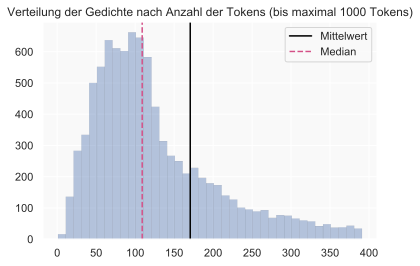

In [28]:
sns.distplot(poems.poemlength, 
             kde=False, 
             rug=False, 
             bins=range(1, 400, 10), 
             hist_kws=dict(edgecolor="black", linewidth=0.1),
             axlabel="")
plt.axvline(poems.poemlength.mean(), 0, 1, 
            linestyle="-",
            color="black",
            label="Mittelwert")
plt.axvline(poems.poemlength.median(), 0, 1, 
            linestyle="--",
            color="#d45087",
            label="Median")
plt.legend()
#sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff'})
plt.title("Verteilung der Gedichte nach Anzahl der Tokens (bis maximal 1000 Tokens)")
plt.show()

## Verteilung der Anzahl der geschriebenen Gedichte jedes Dichter 

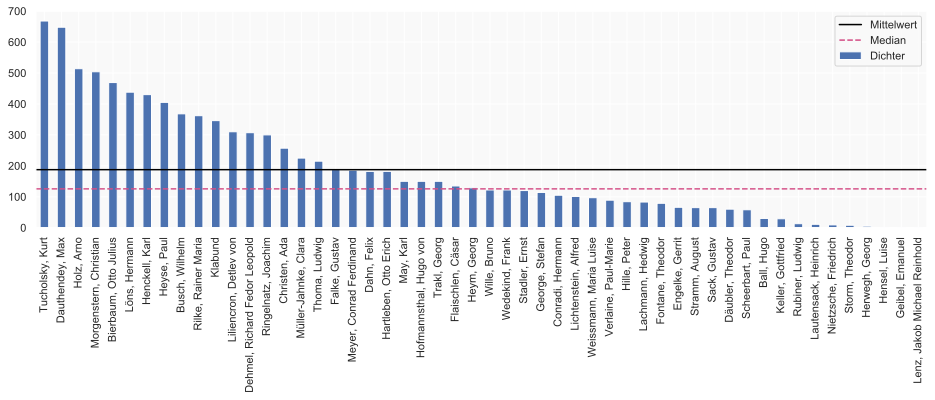

In [51]:
poems.poet.value_counts().plot(kind="bar",
                               figsize=(16, 4),
                               label="Dichter")
plt.axhline(poems.poet.value_counts().mean(), 0, 1, 
            linestyle="-",
            color="black",
            label="Mittelwert")
plt.axhline(poems.poet.value_counts().median(), 0, 1, 
            linestyle="--",
            color="#d45087",
            label="Median")
plt.legend()
plt.show()